In [42]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
plot.prepare_for_plots()

<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
# NB: тут два обучения с нуля, отличающиеся только количеством эпох

# From scratch: full training

In [85]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/scratch_full_{i}.pt')

Batch #:   0%|          | 0/235 [00:00<?, ?it/s]

Model 2
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 58.1%, Validation loss: 1.290641 

Epoch 2
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 64.6%, Validation loss: 1.044985 

Epoch 3
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 66.3%, Validation loss: 0.963427 

Epoch 4
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 67.3%, Validation loss: 0.925717 

Epoch 5
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 68.0%, Validation loss: 0.903784 

Epoch 6
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 68.4%, Validation loss: 0.888981 

Epoch 7
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 68.8%, Validation loss: 0.878100 

Epoch 8
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.0%, Validation loss: 0.869687 

Epoch 9
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.3%, Validation loss: 0.862333 

Epoch 10
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.4%, Validation loss: 0.856226 

Epoch 11
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.6%, Validation loss: 0.850606 

Epoch 12
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.6%, Validation loss: 0.845321 

Epoch 13
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.7%, Validation loss: 0.841018 

Epoch 14
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.7%, Validation loss: 0.836874 

Epoch 15
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.9%, Validation loss: 0.833367 

Epoch 16
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.9%, Validation loss: 0.829827 

Epoch 17
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.1%, Validation loss: 0.826676 

Epoch 18
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.1%, Validation loss: 0.823907 

Epoch 19
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.2%, Validation loss: 0.821356 

Epoch 20
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.2%, Validation loss: 0.819144 

Epoch 21
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.4%, Validation loss: 0.816389 

Epoch 22
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.5%, Validation loss: 0.813787 

Epoch 23
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.5%, Validation loss: 0.811582 

Epoch 24
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.6%, Validation loss: 0.809726 

Epoch 25
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.7%, Validation loss: 0.807787 

Epoch 26
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.7%, Validation loss: 0.806346 

Epoch 27
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.7%, Validation loss: 0.804556 

Epoch 28
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.8%, Validation loss: 0.803000 

Epoch 29
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.9%, Validation loss: 0.801472 

Epoch 30
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.9%, Validation loss: 0.800087 

Epoch 31
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.9%, Validation loss: 0.798602 

Epoch 32
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.0%, Validation loss: 0.797360 

Epoch 33
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.0%, Validation loss: 0.796208 

Epoch 34
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.0%, Validation loss: 0.795382 

Epoch 35
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.1%, Validation loss: 0.794373 

Epoch 36
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.1%, Validation loss: 0.793097 

Epoch 37
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.1%, Validation loss: 0.791947 

Epoch 38
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.2%, Validation loss: 0.791132 

Epoch 39
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.2%, Validation loss: 0.790287 

Epoch 40
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.2%, Validation loss: 0.788989 

Epoch 41
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 71.2%, Validation loss: 0.788657 

Epoch 42
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.1%, Validation loss: 0.619706 

Epoch 43
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.3%, Validation loss: 0.608855 

Epoch 44
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.4%, Validation loss: 0.603760 

Epoch 45
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.5%, Validation loss: 0.600484 

Epoch 46
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.6%, Validation loss: 0.598189 

Epoch 47
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.7%, Validation loss: 0.596258 

Epoch 48
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.8%, Validation loss: 0.594522 

Epoch 49
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.8%, Validation loss: 0.593013 

Epoch 50
-------------------------------


Batch #:   0%|          | 0/40 [00:00<?, ?it/s]           

Validation accuracy: 77.9%, Validation loss: 0.591891 



Batch #:   0%|          | 0/40 [00:00<?, ?it/s]         

FSGM Accuracy [0.7791, 0.7533, 0.7204, 0.6848, 0.6401, 0.5965, 0.5511, 0.5024, 0.4576, 0.412]


Noise Accuracy [0.7791, 0.7701, 0.7432, 0.6782, 0.6339, 0.586, 0.4815, 0.4229, 0.3723, 0.3322]


50 50


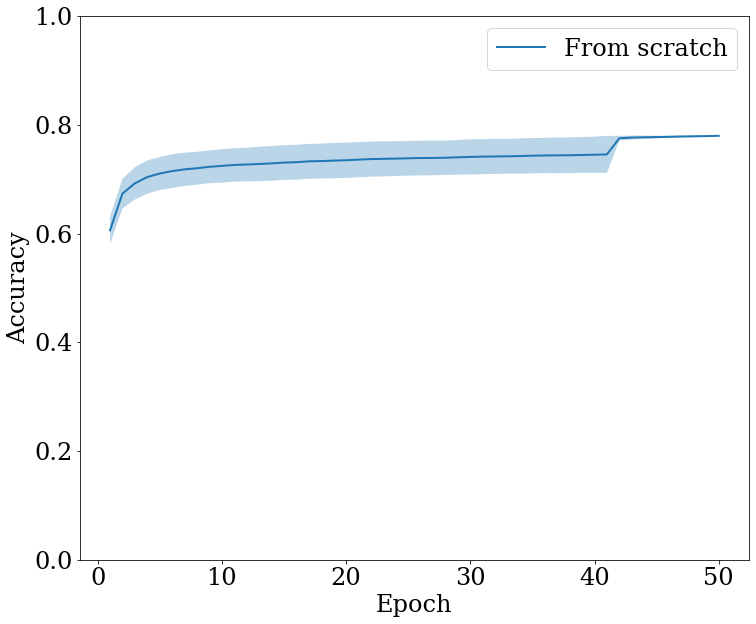

In [99]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

10 10


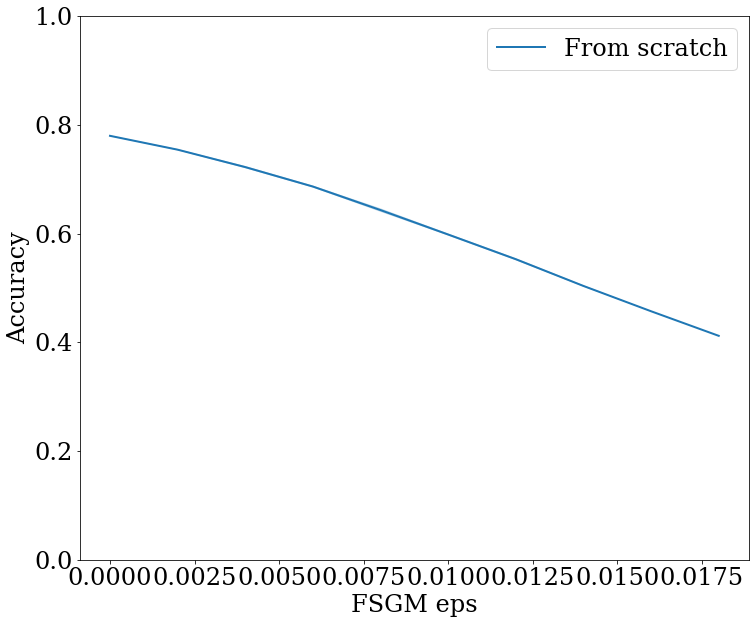

In [100]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

10 10


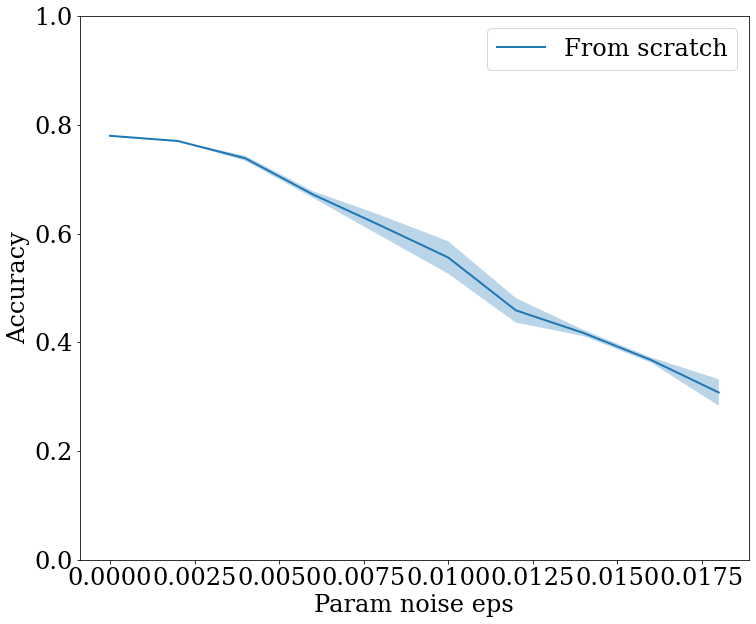

In [102]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [103]:
with open(pipeline.get_path()+'/history_full_scratch.json', 'w') as out:
    out.write(json.dumps(history))

# From scratch: 5-classes-like training

In [104]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/scratch_5_{i}.pt')

Batch #:   0%|          | 0/235 [00:00<?, ?it/s]

Model 2
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 58.1%, Validation loss: 1.290641 

Epoch 2
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 64.6%, Validation loss: 1.044985 

Epoch 3
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 66.3%, Validation loss: 0.963427 

Epoch 4
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 67.3%, Validation loss: 0.925717 

Epoch 5
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 68.0%, Validation loss: 0.903784 

Epoch 6
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 68.4%, Validation loss: 0.888981 

Epoch 7
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 68.8%, Validation loss: 0.878100 

Epoch 8
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.0%, Validation loss: 0.869687 

Epoch 9
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.3%, Validation loss: 0.862333 

Epoch 10
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.4%, Validation loss: 0.856226 

Epoch 11
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.6%, Validation loss: 0.850606 

Epoch 12
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.6%, Validation loss: 0.845321 

Epoch 13
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.7%, Validation loss: 0.841018 

Epoch 14
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.7%, Validation loss: 0.836874 

Epoch 15
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.9%, Validation loss: 0.833367 

Epoch 16
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 69.9%, Validation loss: 0.829827 

Epoch 17
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.1%, Validation loss: 0.826676 

Epoch 18
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.1%, Validation loss: 0.823907 

Epoch 19
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.2%, Validation loss: 0.821356 

Epoch 20
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.2%, Validation loss: 0.819144 

Epoch 21
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.4%, Validation loss: 0.816389 

Epoch 22
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.5%, Validation loss: 0.813787 

Epoch 23
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.5%, Validation loss: 0.811582 

Epoch 24
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.6%, Validation loss: 0.809726 

Epoch 25
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.7%, Validation loss: 0.807787 

Epoch 26
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.7%, Validation loss: 0.806346 

Epoch 27
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.7%, Validation loss: 0.804556 

Epoch 28
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.8%, Validation loss: 0.803000 

Epoch 29
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 70.9%, Validation loss: 0.801472 

Epoch 30
-------------------------------


Batch #:   0%|          | 0/40 [00:00<?, ?it/s]           

Validation accuracy: 70.9%, Validation loss: 0.800087 



Batch #:   0%|          | 0/40 [00:00<?, ?it/s]         

FSGM Accuracy [0.7087, 0.6929, 0.675, 0.6516, 0.6229, 0.595, 0.563, 0.5308, 0.4976, 0.4669]


Noise Accuracy [0.7087, 0.7004, 0.6862, 0.6299, 0.5948, 0.5246, 0.4731, 0.3995, 0.3512, 0.312]


30 30


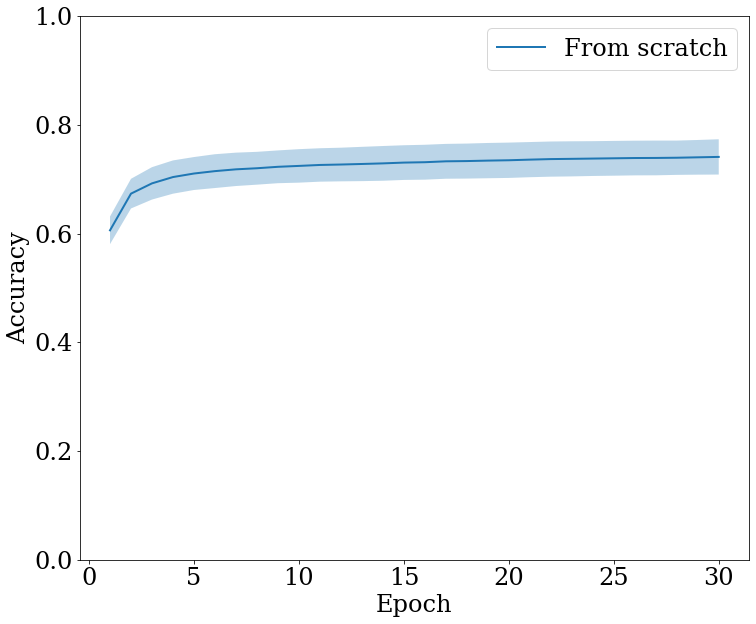

In [106]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

10 10


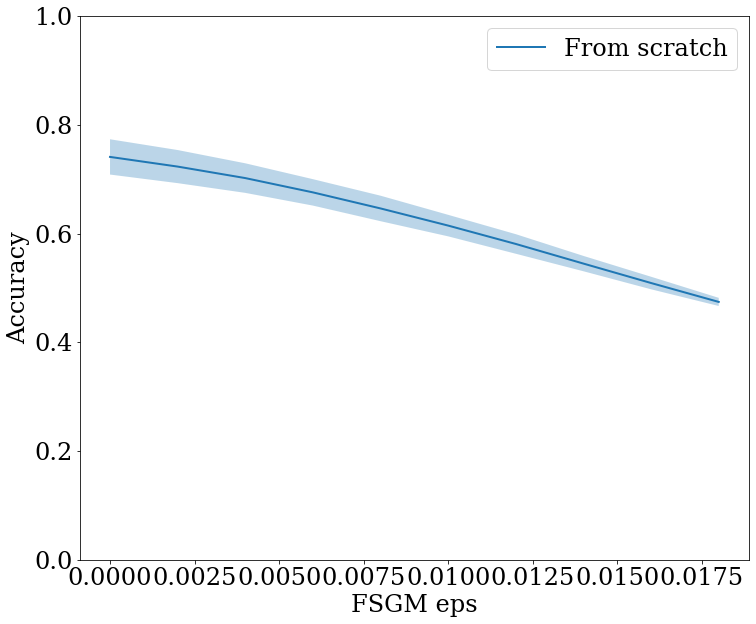

In [107]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

10 10


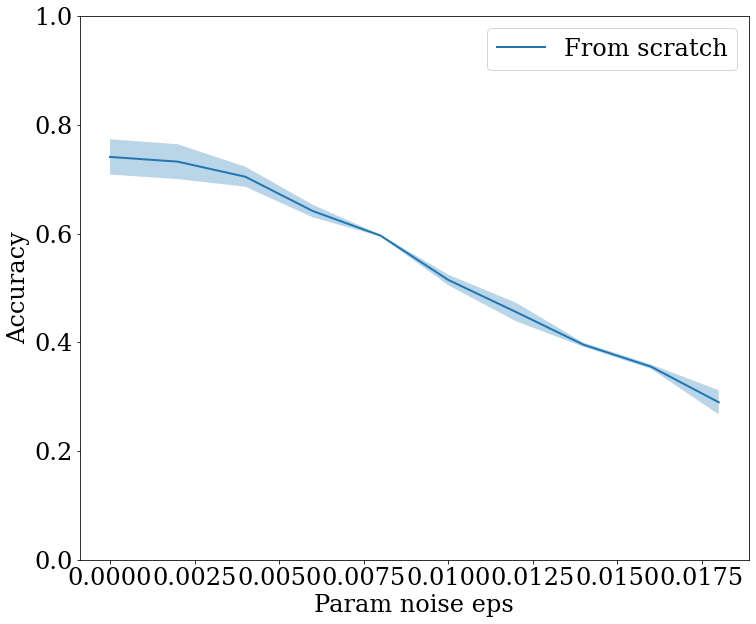

In [108]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [109]:
with open(pipeline.get_path()+'/history_5_scratch.json', 'w') as out:
    out.write(json.dumps(history))